# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


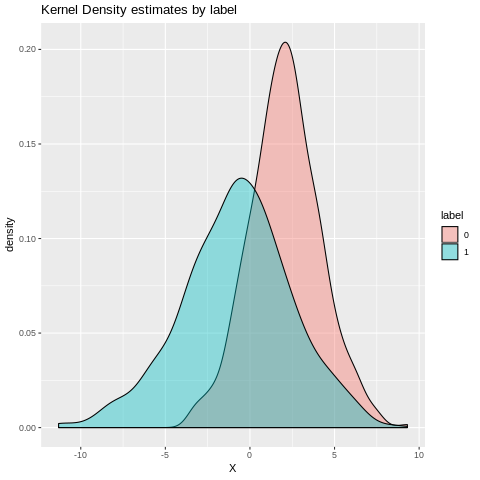

In [6]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!


#This coverts the 'label' column to a factor to work with ggplot2
dat$label <- as.factor(dat$label)

#plots the data as a kernel density, using the two factors for fill colors
ggplot(dat, aes(x = X)) + 
  geom_density(aes(fill = label), alpha = 0.4) + 
  ggtitle("Kernel Density estimates by label")


# Problem 2: Using Classes in Python

In [7]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!
        
        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [8]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [9]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
import random
random.shuffle(dat)
#this function shuffles the data in place - no need for anything fancier



In [10]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [11]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data
train = dat[:700]
test = dat[700:]
print(len(train), len(test))


700 300


In [20]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

#Using list comprehension
train_X = [x for x,y in train]
train_y = [y for x,y in train]
test_X = [x for x,y in test]
test_y = [y for x,y in test]

#OR, even better, deconstruct the lists using zip and * - basically the opposite of zip
train_X, train_y = zip(*train)
test_X, test_y = zip(*test)

## Problem 2.3: Testing models!

In [21]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
#Simmply iniitalize the two different models
model = KNearestNeighbors(K=5)
model2 = KFurthestNeighbors(K=5)

# 2. Train the instance on the "train" groups X's and labels (y's)
#Call the fit method of the models - basically just stores the data into our models
mfit = model.fit(train_X, train_y)
mfit2 = model2.fit(train_X, train_y)

# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
# We have to call the predict method for each new X we want to predict - list comprehension like this
# is much cleaner than a for loop
pred_labels = [mfit.predict(x) for x in test_X]
pred_labels2 = [mfit2.predict(x) for x in test_X]

#    B. Use your "test" labels to see if the predicted label is equal the true label
# Again we use list commprehension in place of a loop to go over all the predicted values
# We have to zip the predictions and actual values into one list in order to do the pred==act comparison like this
correct = [pred==act for pred, act in zip(pred_labels, test_y)]
correct2 = [pred==act for pred, act in zip(pred_labels2, test_y)]


In [22]:
# Compare the two classes of models!
#Summing up the Boolean list we created above tells us the number of correct predictions
print("Nearest Neighbors correct predictions:", sum(correct), "or,", 
      round(sum(correct)/len(test_y)*100,1), "percent")
print("Furthest Neighbors correct predictions:", sum(correct2), "or,", 
      round(sum(correct2)/len(test_y)*100,1), "percent")

Nearest Neighbors correct predictions: 197 or, 65.7 percent
Furthest Neighbors correct predictions: 205 or, 68.3 percent


In [23]:
if sum(correct)>sum(correct2):
    print("Nearest Neighbors was more accurate")
elif sum(correct)<sum(correct2):
    print("Furthest Neighbors was more accurate!")
else:
    print("Models got the same number correct")
    

Furthest Neighbors was more accurate!
